In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TSA_week_wise_sales_25_01_24.csv")

In [4]:
df.head()

week    Sales
0     1  10618.1
1     2  10537.9
2     3  10209.3
3     4  10553.0
4     5   9934.9

In [5]:
df["Sales"]

0      10618.1
1      10537.9
2      10209.3
3      10553.0
4       9934.9
        ...   
115    10650.0
116    10741.6
117    10246.0
118    10354.4
119    10155.4
Name: Sales, Length: 120, dtype: float64

<Axes: xlabel='week', ylabel='Sales'>

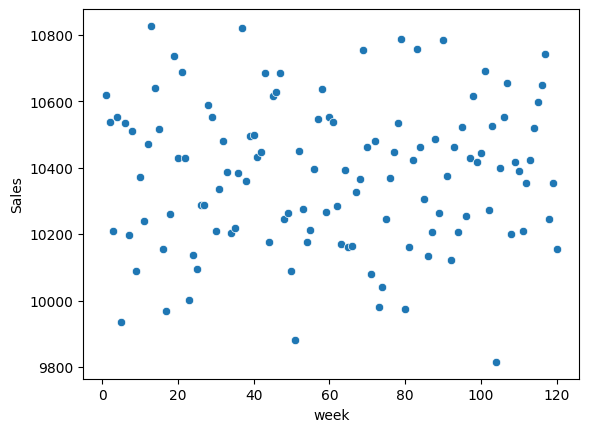

In [6]:
sns.scatterplot(x='week', y='Sales', data=df)

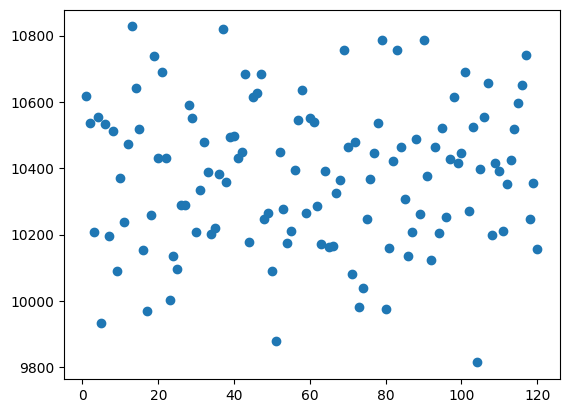

In [7]:
plt.scatter(df['week'],df["Sales"])

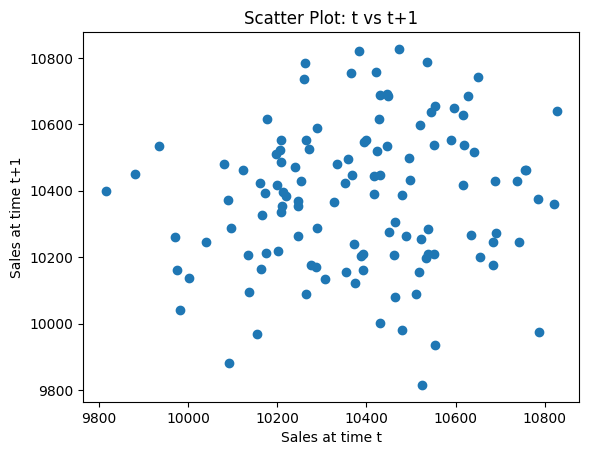

In [8]:
plt.scatter(df['Sales'][:-1], df['Sales'][1:])
plt.title('Scatter Plot: t vs t+1')
plt.xlabel('Sales at time t')
plt.ylabel('Sales at time t+1')
plt.show()

In [9]:
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Chemical Process Viscosity.csv")

In [10]:
df1

Time Period  Reading
0             1  86.7418
1             2  85.3195
2             3  84.7355
3             4  85.1113
4             5  85.1487
..          ...      ...
95           96  85.7609
96           97  85.2302
97           98  86.7312
98           99  87.0048
99          100  85.0572

[100 rows x 2 columns]

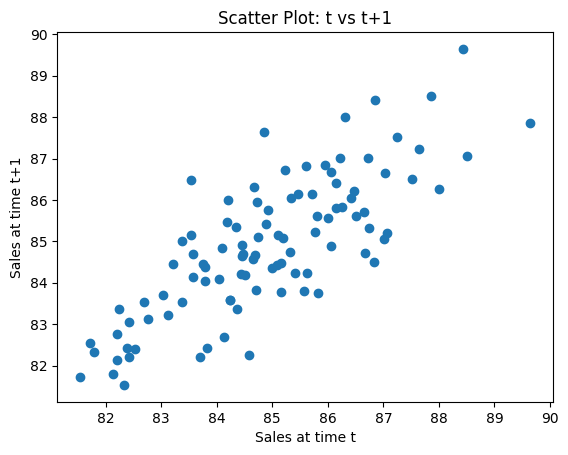

In [11]:
plt.scatter(df1['Reading'][:-1], df1['Reading'][1:])
plt.title('Scatter Plot: t vs t+1')
plt.xlabel('Sales at time t')
plt.ylabel('Sales at time t+1')
plt.show()

Autocovariance at lag T/4: 23200.01905000001


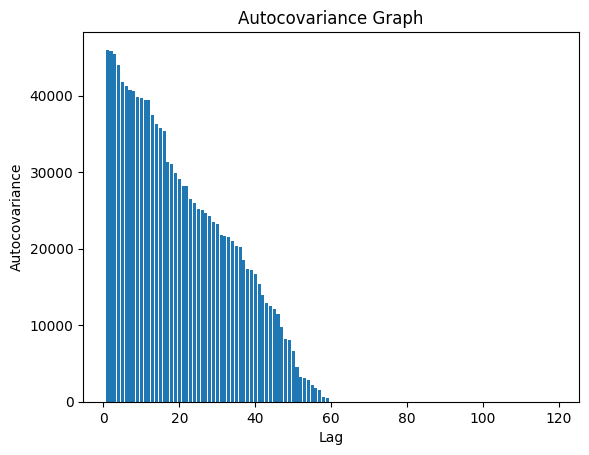

In [12]:
df['Sales'].mean()

10379.130000000001

In [13]:
R_mean = df1["Reading"].mean()

X=0
for i in range(100):
    X+= (df1["Reading"][i]-R_mean)**2
c0 = (1/100)*X

summ=0
for i in range(99):
    summ+= (df1["Reading"][i]-R_mean)*(df1["Reading"][i+1]-R_mean)
c1 = summ/100

In [14]:
c0,c1

(2.809332232475001, 2.2031374556027514)

In [15]:
c_values = np.zeros(26)

for k in range(26):
    summ = 0
    for i in range(100 - k):
        summ += (df1["Reading"][i] - R_mean) * (df1["Reading"][i + k] - R_mean)
    c_values[k] = summ / 100

In [16]:
c_values

array([ 2.80933223,  2.20313746,  1.76440272,  1.38102314,  1.01944475,
        0.85558721,  0.58708791,  0.46163073,  0.40675999,  0.29111733,
        0.18698471,  0.01108516, -0.21695819, -0.14595869,  0.05765553,
        0.2044723 ,  0.19877034,  0.00374679, -0.16135807, -0.34589973,
       -0.5072173 , -0.45642164, -0.41010496, -0.24558815, -0.03252493,
        0.17747218])

In [17]:
r_values = c_values / c_values[0]

In [18]:
r_values

array([ 1.        ,  0.78422104,  0.62805057,  0.49158413,  0.36287796,
        0.30455181,  0.20897774,  0.16432045,  0.14478885,  0.1036251 ,
        0.06655842,  0.00394583, -0.07722767, -0.05195494,  0.02052286,
        0.07278324,  0.07075359,  0.0013337 , -0.05743645, -0.12312525,
       -0.18054728, -0.16246624, -0.14597951, -0.08741869, -0.01157746,
        0.06317237])

In [27]:
# df3.drop(["lag"],axis=1,inplace = True)

In [25]:
df = pd.DataFrame({'c_values': c_values, 'r_values': r_values})

# Display the DataFrame
print(df.head())

   c_values  r_values
0  2.809332  1.000000
1  2.203137  0.784221
2  1.764403  0.628051
3  1.381023  0.491584
4  1.019445  0.362878


<Axes: >

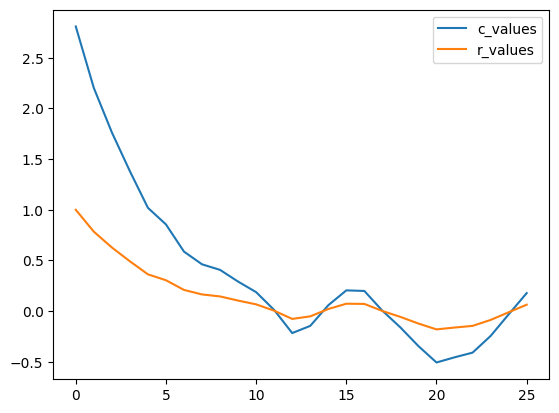

In [26]:
df.plot()

In [24]:
# df3 = pd.DataFrame(c_values,r_values,column_name=["c_values","r_values"])

TypeError: DataFrame.__init__() got an unexpected keyword argument 'column_name'

In [21]:
df3

0
 1.000000  2.809332
 0.784221  2.203137
 0.628051  1.764403
 0.491584  1.381023
 0.362878  1.019445
 0.304552  0.855587
 0.208978  0.587088
 0.164320  0.461631
 0.144789  0.406760
 0.103625  0.291117
 0.066558  0.186985
 0.003946  0.011085
-0.077228 -0.216958
-0.051955 -0.145959
 0.020523  0.057656
 0.072783  0.204472
 0.070754  0.198770
 0.001334  0.003747
-0.057436 -0.161358
-0.123125 -0.345900
-0.180547 -0.507217
-0.162466 -0.456422
-0.145980 -0.410105
-0.087419 -0.245588
-0.011577 -0.032525
 0.063172  0.177472

In [28]:
# df3["lag"] = range(1,27)